### THE SPARKS FOUNDATION

#### GRIP - GRADUATION ROTATIONAL INTERNSHIP PROGRAM

### NAME - ANJALI DUBEY

#### TASK 3 : EXPLORATORY DATA ANALYSIS - RETAIL (LEVEL - BEGINNER)

In [ ]:
#EDA is a process of analyzing the datasets to summarize their main features using numerical and visual methods¶

##### IMPORTING ALL THE IMPORTANT LIBRARIES

In [1]:
#lets import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [3]:
df = pd.read_csv('SampleSuperstore.csv') #GET THE DATA

###### GETTING TO KNOW OUR DATA

In [4]:
df.head() #FIRST FIVE RECORDS

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail() #LAST FIVE RECORDS

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.shape  #9994 ROWS AND 13 COLUMNS

(9994, 13)

In [7]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
df.duplicated().sum() #CHECKING, HOW MANY DUPLICATE VALUES OUR DATA HAVE

17

In [9]:
df = df.drop_duplicates() #DROPPING ALL THE DUPLICATES VALUES FROM OUR DATA BECAUSE THEY CAN AFFECT OUR ANALYSIS LATER ON

In [12]:
df.isnull().sum() #CHECKING IF THERE ARE ANY NULL VALUE IN OUR DATA

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#THERE ARE NO NULL VALUES

In [15]:
df.describe()    #GETTING THE SUMMARY STATISTICS OF ALL THE NUMERIC COLUMNS

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [17]:
df.describe(include = "O")  #GETTING THE SUMMARY STATISTICS OF ALL THE CATEGORICAL COLUMNS

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


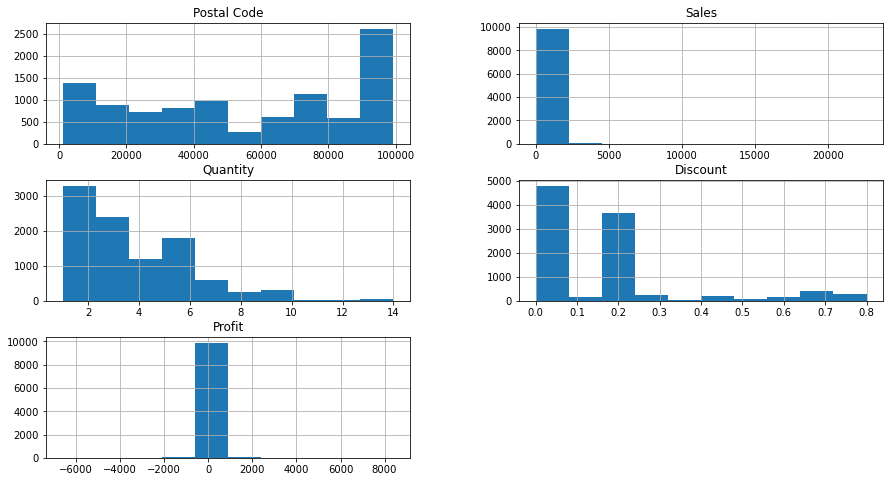

In [18]:
df.hist()
plt.show()

In [19]:
print(df.skew())  #SKEWNESS 

Postal Code    -0.127166
Sales          12.963770
Quantity        1.276709
Discount        1.683386
Profit          7.554748
dtype: float64


In [20]:
#QUANTITY AND DISCOUNT ARE POSITIVELY SKEWED

In [21]:
df.corr() #CORRELATION

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


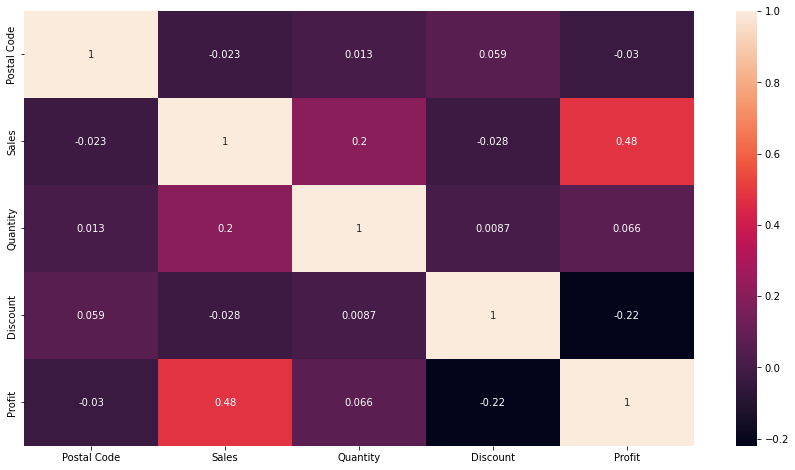

In [23]:
sns.heatmap(df.corr(),annot=True)   #SHOWING THE CORRELATION BETWEEN ALL THE NUMERIC COLUMNS
plt.show()

In [24]:
#THERE IS A MODERATE CORRELATION BETWEEN SALES AND PROFIT

### CATEGORICAL VALUES`

In [30]:
df.columns  #SHOWING ALL THE COLUMNS WE GOT IN OUR DATA

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [31]:
df_cat = df.select_dtypes(include='O')

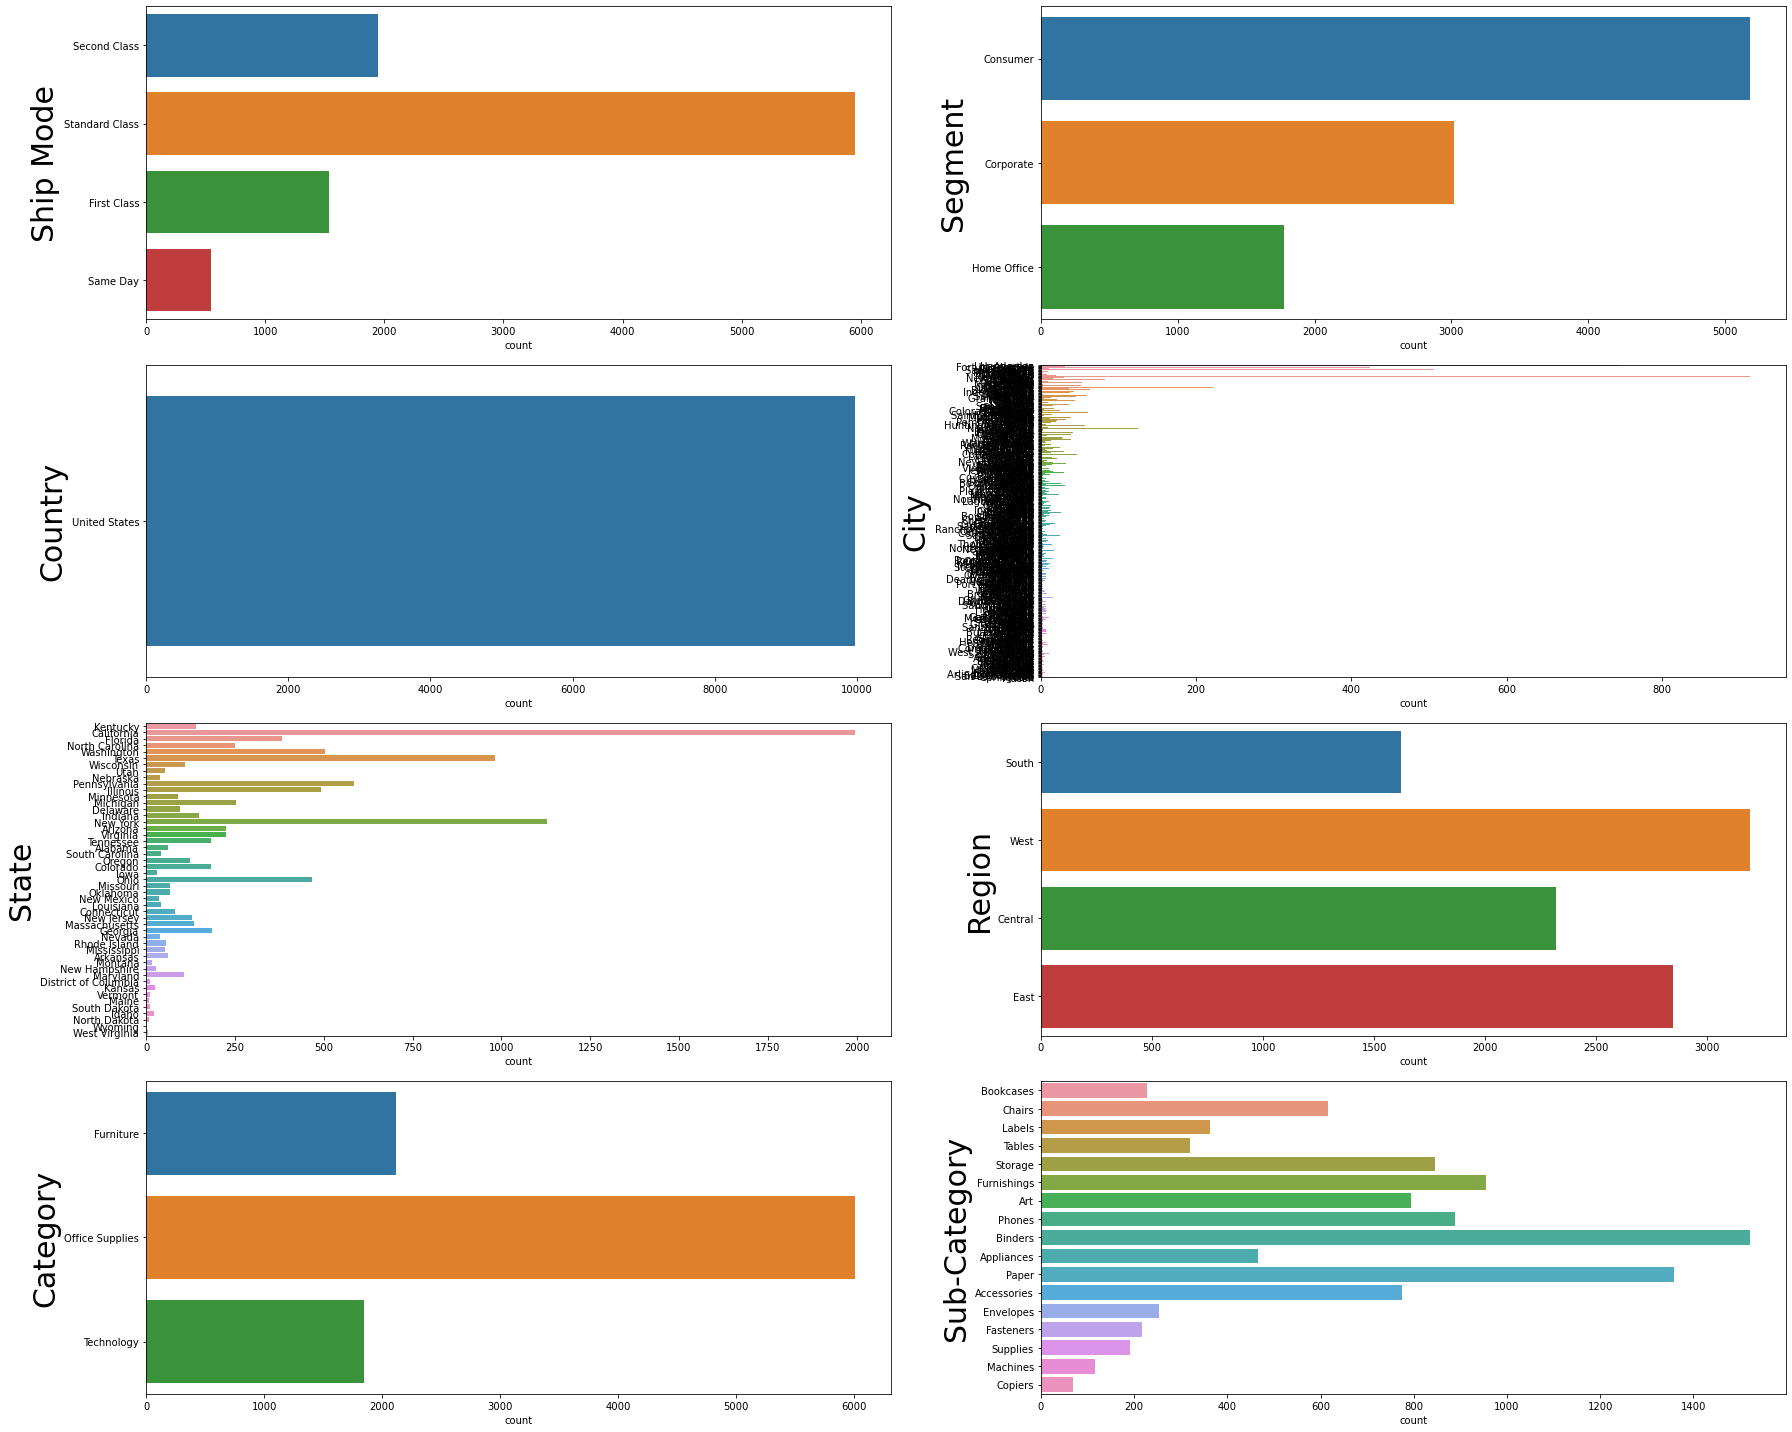

In [35]:
# PLOTTING THE COUNT DISTRIBUTION FOR EACH CATEGORICAL VARIABLE
fig, ax = plt.subplots(4, 2, figsize=(25, 20))

#PLOTTING COUNT PLOT FOR ALL THE CATEGORICAL VARIABLE
for variable, subplot in zip(df_cat, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
# AVOID OVERLAPPING THE PLOTS   
plt.tight_layout()   

#DISPLAY THE PLOT
plt.show()

###### CONCLUSION :

In [ ]:
#1. MAXIMUM SHIPPING IS TAKING PLACE THROUGH STANDARD CLASS
#2. THE CONSUMER SEGMENT GAVE MOST OF THE SALES
#3. THE WEST REGION HAS HIGHEST SALES AND MAX SALES DONE THROUGH BINDERS,FURNISHING,PAPER WHICH BELONGS TO OFFICE SUPPLY CATEGORY. 

In [37]:
#PAIR-WISE RELATIONSHIP BETWEEN ALL THE NUMERICAL VARIABLES

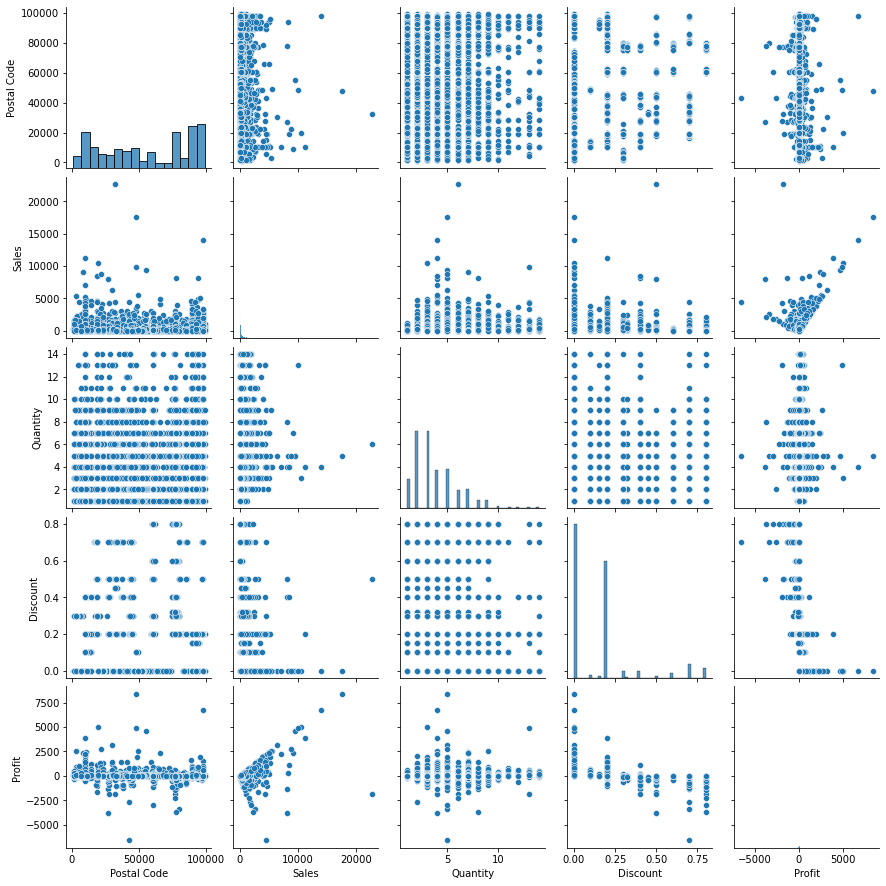

In [36]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Region'>

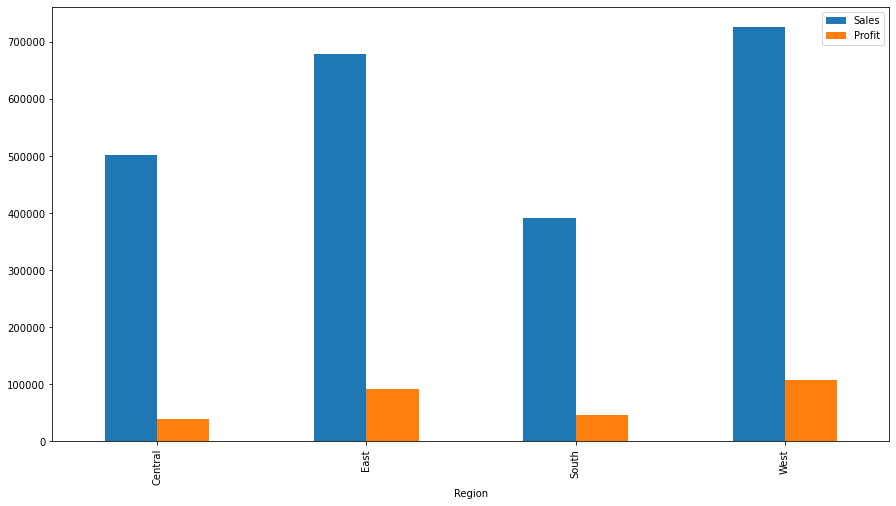

In [38]:
df.groupby(['Region'])[['Sales','Profit']].sum().plot(kind='bar')

In [39]:
# WE CAN CLEARLY SEE THAT HIGHER SALES AND HIGHER PROFIT SHOWN IN WEST REGION FOLLOWED BY EAST REGION
# SOUTH REGION AND CENTRAL REGIION DON'T HAVE SALES AND PROFIT COMPARED TO ANOTHER TWO REGIONS

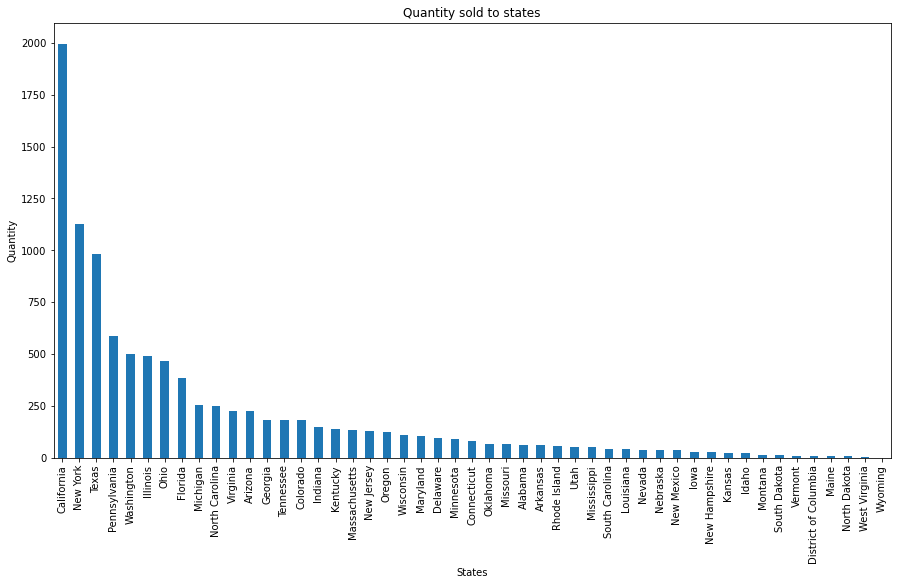

In [40]:
df_state_quantity=df.groupby(['State'])['Quantity'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold to states')
plt.xlabel('States')
plt.ylabel('Quantity')
plt.show()

In [ ]:
# CALIFORNIA HAS THE HIGHEST QUANTITY SOLD (2K),FOLLOWED BY NEW YORK (APPROX. 1125) OF TOTAL DEALS.
# TEXAS IS THE 3RD LARGEST QUANTITY SOLD (1K)
# THE STATES WHICH HAVE LESS THAN 1O0 QUANTITY SOLD , NEEDS TO WORK ON THEIR MARKETING STRATEGY AND DISTRIBUTION TO BOOST THEIR SALES

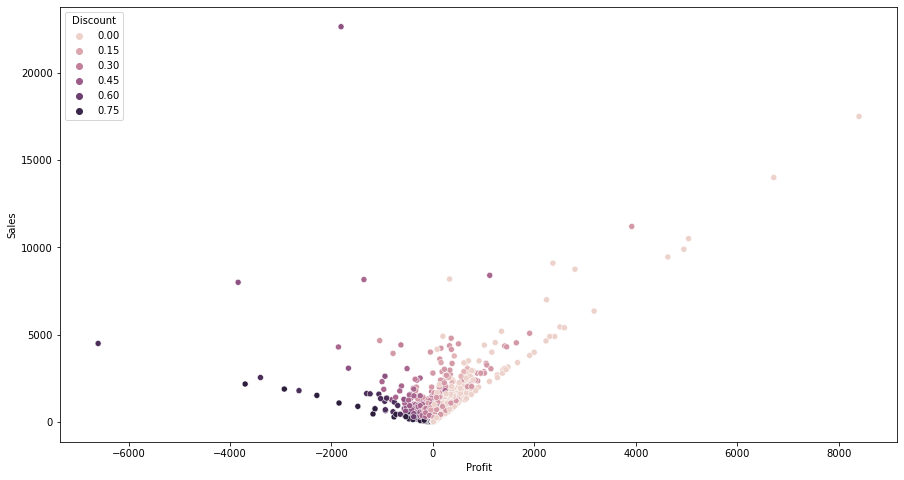

In [41]:
sns.scatterplot(df['Profit'],df['Sales'],hue=df['Discount'])
plt.show()

In [42]:
# DUE TO DISCOUNT, BUSINESS IS GOING DOWN
# GIVING HUGE DISCOUNT DOES NOT GO REALLY WELL FOR BUSINESS AND THEY BEAR LOSS AT THE END.

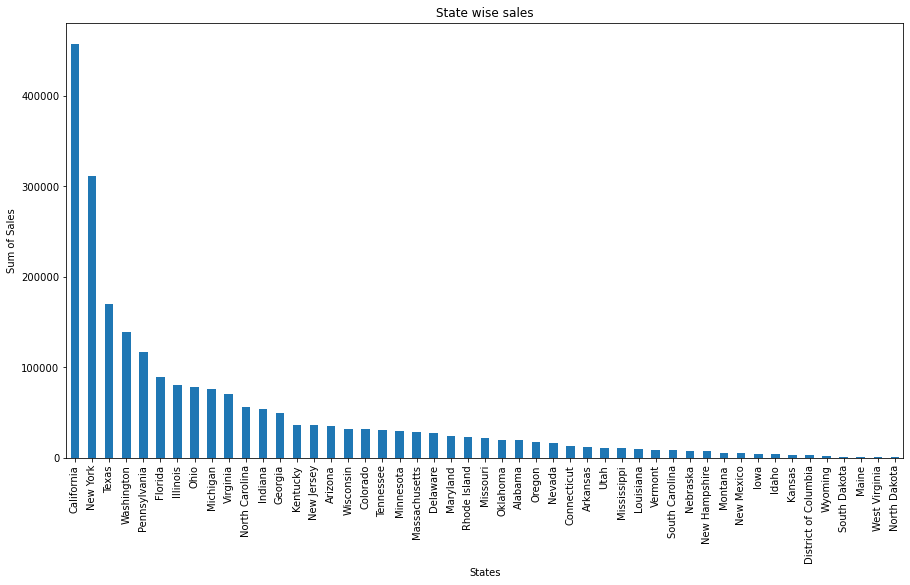

In [43]:
df_state_sales=df.groupby(['State'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise sales')
plt.xlabel('States')
plt.ylabel('Sum of Sales')
plt.show()

In [44]:
# CALIFORNIA HAS $450K SALES (HIGHEST)
# NEW YORK HAS $300K SALES (2ND HIGHEST)
# TEXAS HAS $175K SALES (3RD HIGHEST)
# COMPARING TO OTHER STATES,WYOMING,SOUTH DAKOTA,MAINE,WEST VIRGINIA AND NORTH DAKOTA HAVE NEGLIGIBLE SALES. 
# DISTRIBUTION CHAIN AND MARKETING STRATEGY SHOULD BE IMPROVED IN THESE AREAS ALONG WITH THE STAES WHICH HAVE LESS THAN $20K SALES.
# MEANWHILE, WE SHOULD TAKE APPROPRIATE STEPS TO NOT LET GO OF OUR EXISTING CUSTOMERS.

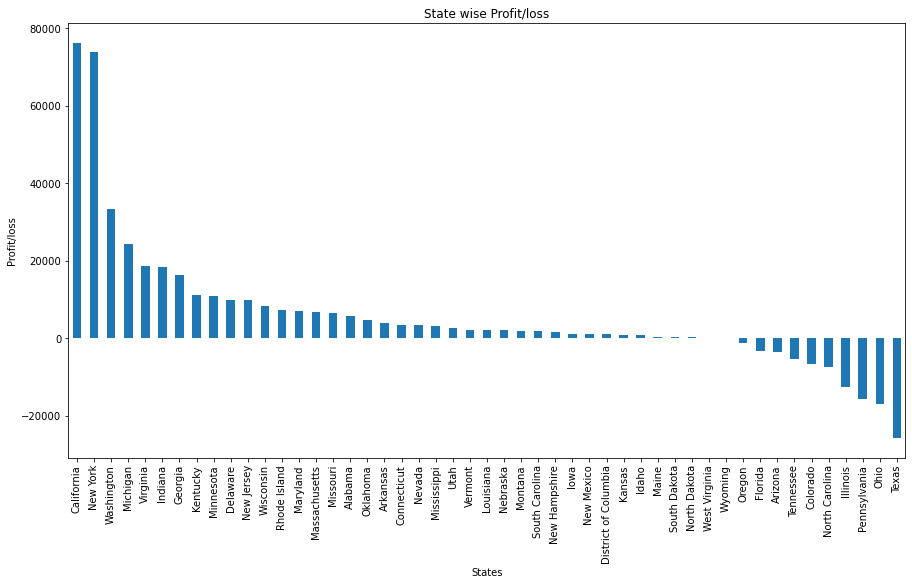

In [45]:
df_state_profit=df.groupby(['State'])['Profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise Profit/loss')
plt.xlabel('States')
plt.ylabel('Profit/loss')
plt.show()

In [46]:
# CALIFORNIA AND NEW YORK HAVE MAXIMUM PROFIT FOLLOWED BY NEW YORK.
# EVEN THOUGH TEXAS WAS 3RD HIGHEST WITH RESPECT TO SALES BUT IT HAS MAXIMUM LOSSES.

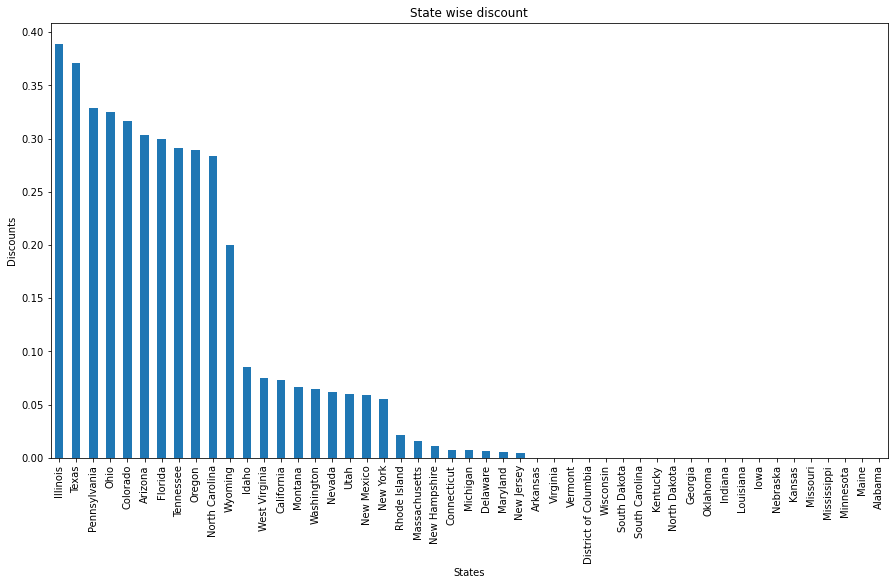

In [47]:
df_state_sales=df.groupby(['State'])['Discount'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise discount')
plt.xlabel('States')
plt.ylabel('Discounts')
plt.show()

In [ ]:
# EVEN THOUGH TEXAS IS 2ND HIGHEST IN TERMS OF DISCOUNT,THERE IS NO PROFIT GENERATION.

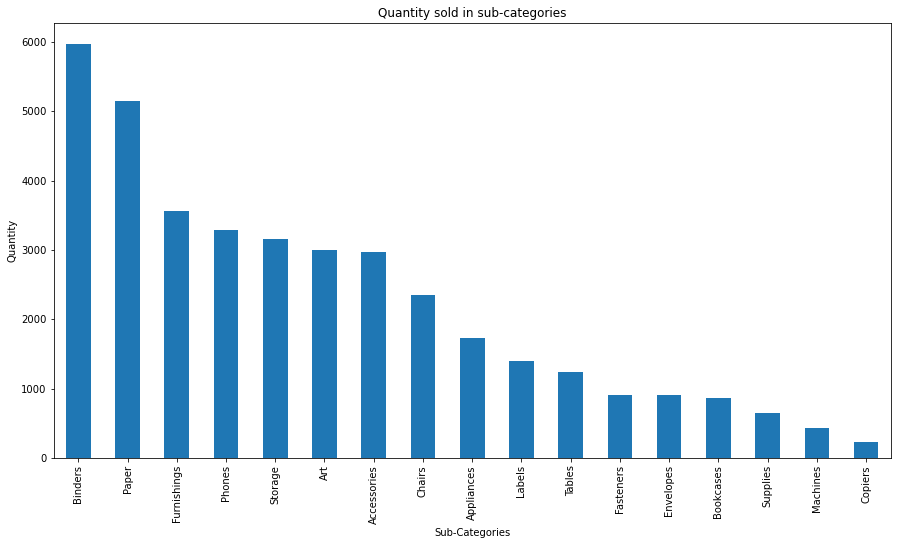

In [48]:
df_subcategory_deals=df.groupby(['Sub-Category'])['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold in sub-categories')
plt.xlabel('Sub-Categories')
plt.ylabel('Quantity')
plt.show()

In [49]:
# BINDERS,PAPERS,FURNISHING AND PHONES HAS THE HIGHEST RATE OF SALES WITH 6000,5000,3500,3200 UNITS RESPECTIVELY.
# MEANWHILE COPIERS,MACHINES,SUPPLIERS HAS QUITE LESS SALE.

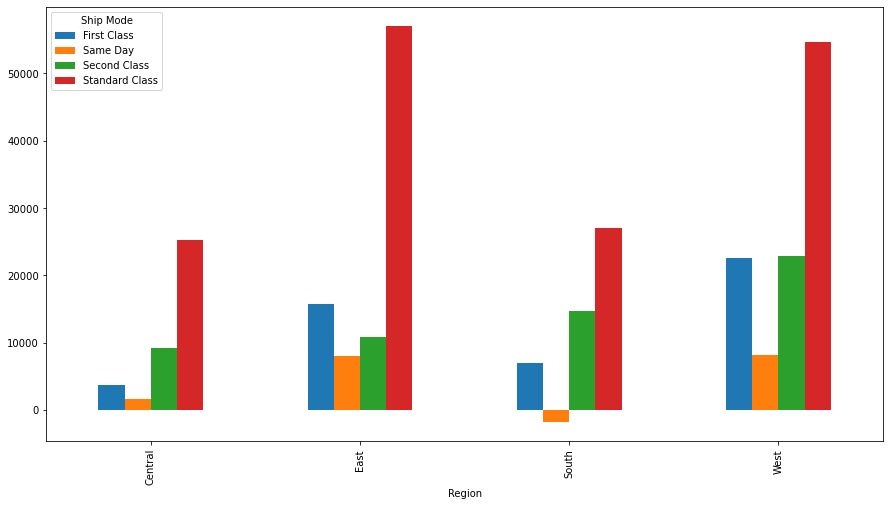

In [50]:
table=pd.crosstab(index=df['Region'],columns=df['Ship Mode'],values=df['Profit'],aggfunc='sum').plot(kind='bar')
table
plt.show()

###### In all of the 4 regions standard class is the most preferred shipment mode giving the high profits . First class ship mode acquires the second position after standard class , with a big trailing gap Shipments going out on the same day of order are showing the lowest profits , the arrangements for the transportation may be the cause of this, In south region shipments on the day of order are going through a loss

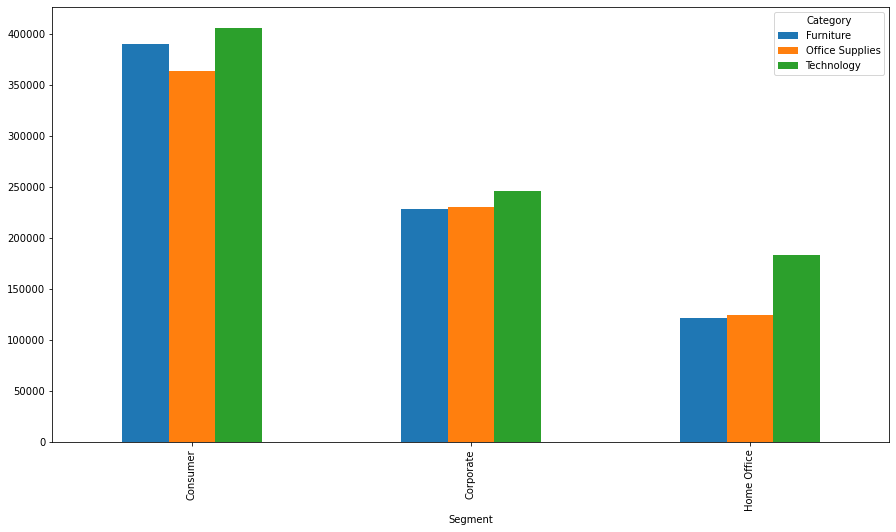

In [51]:
pd.crosstab(index=df['Segment'],columns=df['Category'],values=df['Sales'],aggfunc='sum').plot(kind='bar')
plt.show()

In [52]:
# All 3 segment has high demand for Technology category
# consumer are interested in buying technology products,followed by Furniture and then office supplies
# Corporate are interested in Technology products and has equal demand for both office and furniture
# Home office as high intrest in technology product but low in both furniture as well as office supplies

### THANK YOU!!